## Importing Libraries

In [1]:
import csv
import json
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.pipeline import Pipeline

## Data Loading

In [2]:
path = 'Tweets.csv'

In [3]:
tweet = pd.read_csv(path)

In [4]:
tweet

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


## Data Exploration

In [5]:
tweet.shape

(14640, 15)

In [6]:
tweet.describe

<bound method NDFrame.describe of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativere

In [7]:
tweet.info

<bound method DataFrame.info of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereas

In [8]:
tweet.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

## Preprocessing text Data

In [9]:
def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Join the words back into a string
    processed_text = ' '.join(words)
    
    return processed_text

In [15]:
tweet['processed_text'] = tweet['text'].apply(preprocess_text)

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Data Cleaning

In [16]:
missing_values = tweet.isnull().sum() #checking if there are any missing values
print(missing_values)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
processed_text                      0
dtype: int64


In [17]:
tweet = tweet.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1)

In [18]:
tweet = tweet.dropna(subset=['negativereason', 'negativereason_confidence', 'tweet_location', 'user_timezone'])

In [19]:
tweet['negativereason_confidence'].fillna(tweet['negativereason_confidence'].mean(), inplace=True)

tweet['negativereason'].fillna(tweet['negativereason'].mode()[0], inplace=True)

In [20]:
tweet['negativereason_missing'] = tweet['negativereason'].isnull().astype(int)

## Exploratory Data Analysis

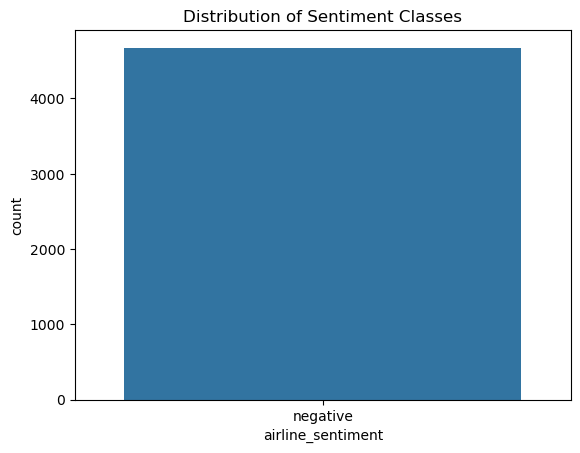

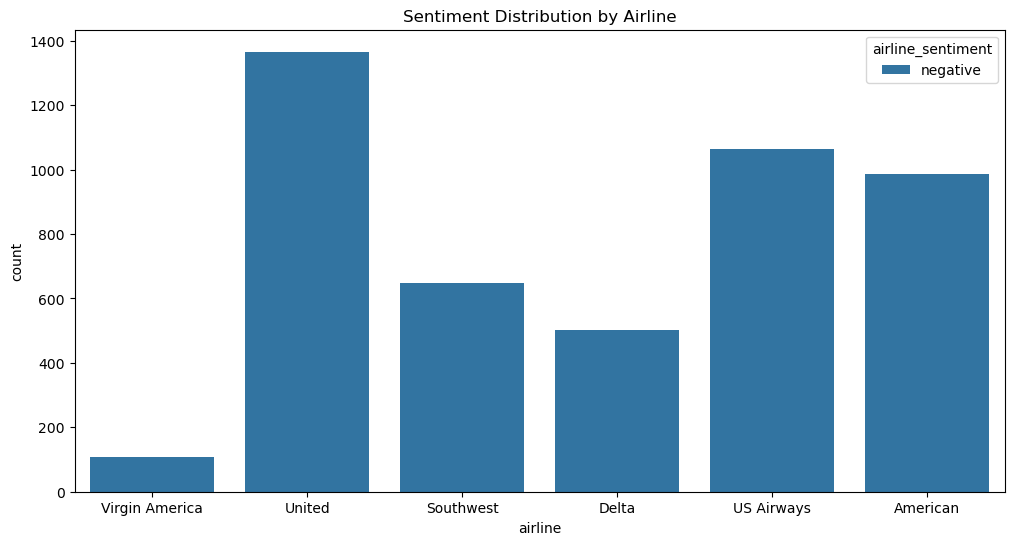

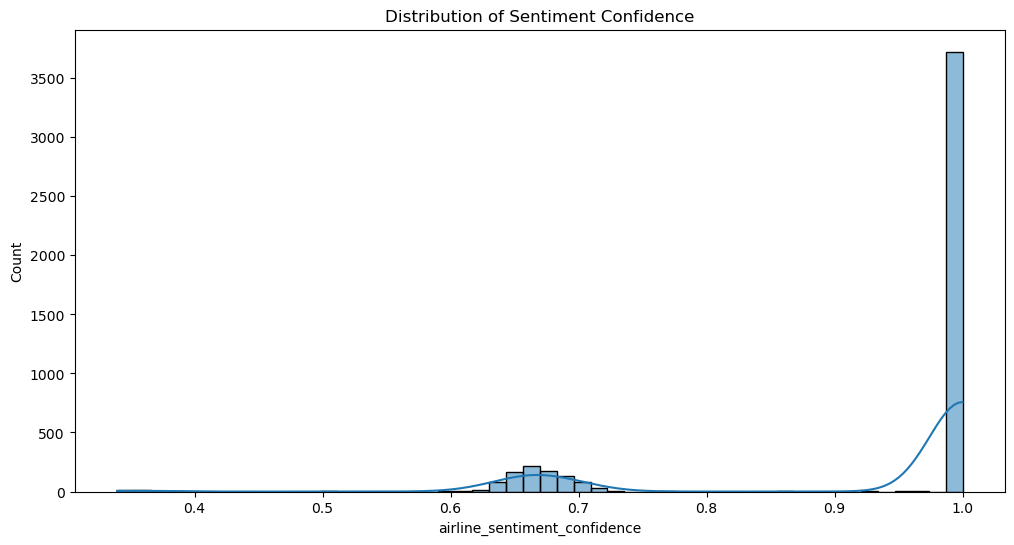

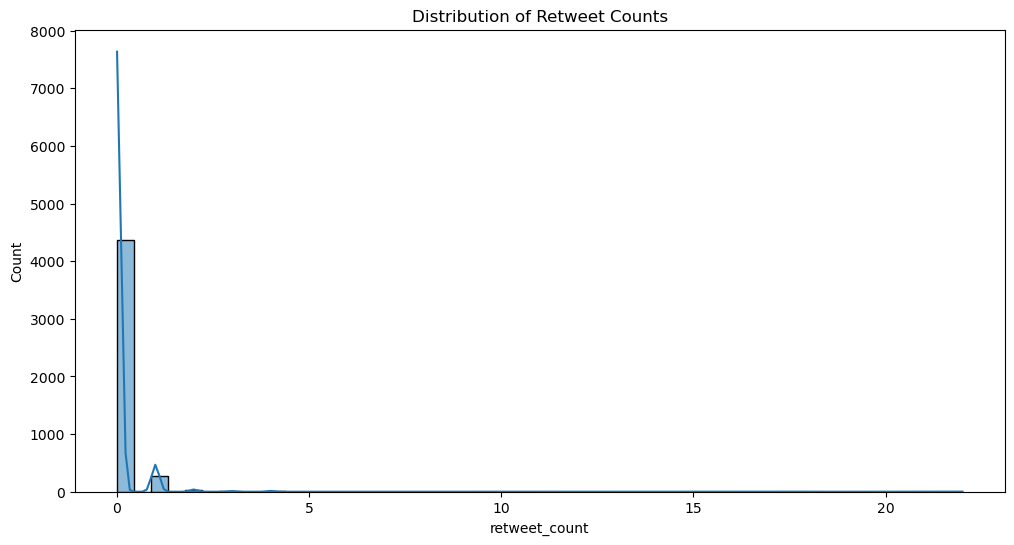

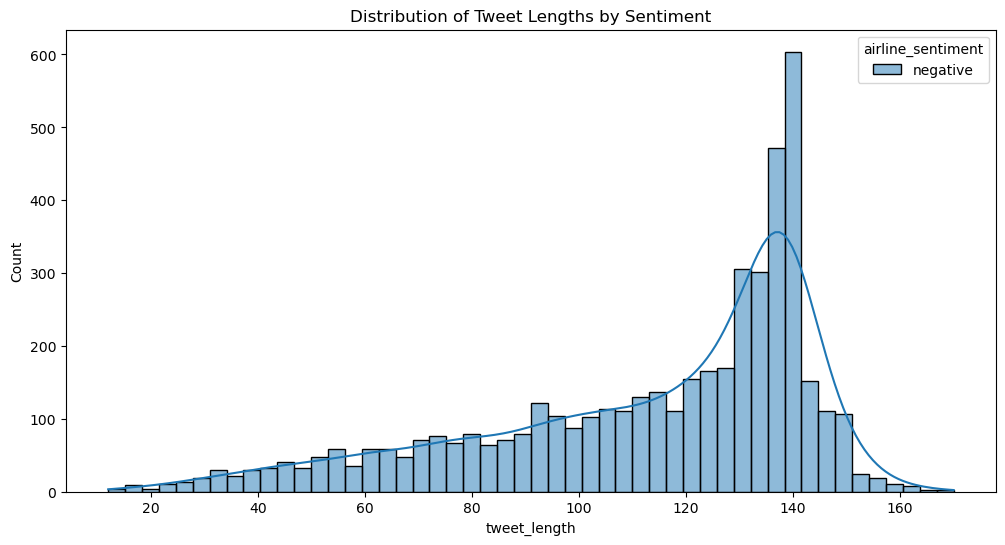

In [21]:
# distribution of sentiment classes
sns.countplot(x='airline_sentiment', data=tweet)
plt.title('Distribution of Sentiment Classes')
plt.show()

# sentiment distribution by airline
plt.figure(figsize=(12, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=tweet)
plt.title('Sentiment Distribution by Airline')
plt.show()

# the distribution of sentiment confidence
plt.figure(figsize=(12, 6))
sns.histplot(x='airline_sentiment_confidence', data=tweet, bins=50, kde=True)
plt.title('Distribution of Sentiment Confidence')
plt.show()

# the distribution of retweet counts
plt.figure(figsize=(12, 6))
sns.histplot(x='retweet_count', data=tweet, bins=50, kde=True)
plt.title('Distribution of Retweet Counts')
plt.show()

# the distribution of tweet lengths
tweet['tweet_length'] = tweet['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(x='tweet_length', hue='airline_sentiment', data=tweet, bins=50, kde=True)
plt.title('Distribution of Tweet Lengths by Sentiment')
plt.show()

## Feature Engineering

In [23]:
tweet['tweet_created'] = pd.to_datetime(tweet['tweet_created'])
tweet['day_of_week'] = tweet['tweet_created'].dt.day_name()
tweet['month'] = tweet['tweet_created'].dt.month
tweet['hour_of_day'] = tweet['tweet_created'].dt.hour

In [24]:
tweet['text_length'] = tweet['text'].apply(len)

In [25]:
tweet['mention_count'] = tweet['text'].apply(lambda x: x.count('@'))
tweet['hashtag_count'] = tweet['text'].apply(lambda x: x.count('#'))

In [26]:
positive_words = ['good', 'great', 'excellent', 'positive_word_here']
negative_words = ['bad', 'negative', 'poor', 'negative_word_here']

tweet['positive_word_count'] = tweet['text'].apply(lambda x: sum(1 for word in x.split() if word.lower() in positive_words))
tweet['negative_word_count'] = tweet['text'].apply(lambda x: sum(1 for word in x.split() if word.lower() in negative_words))

In [27]:
from textblob import TextBlob

tweet['sentiment_polarity'] = tweet['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [28]:
tweet['negativereason_missing'] = tweet['negativereason'].isnull().astype(int)
tweet['tweet_location_missing'] = tweet['tweet_location'].isnull().astype(int)

## Building Model

In [29]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweet['processed_text'], tweet['airline_sentiment'], test_size=0.2, random_state=42)

# Build a pipeline with CountVectorizer and Naive Bayes classifier
model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Displaying confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Confusion Matrix:
[[935]]

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       935

    accuracy                           1.00       935
   macro avg       1.00      1.00      1.00       935
weighted avg       1.00      1.00      1.00       935



## Conclusion:
The evaluation results indicate that the sentiment analysis model achieved perfect accuracy (1.00), correctly predicting all instances in the test set. The precision, recall, and F1-score for the "negative" class are also perfect (1.00).